# Applied math concepts for machine learning - Group 6 project

Students name in this Group:
- Gabriel Okazaki
- Julio Socher
- Kateryna Solonenko
- Mohit Sabharwal
- Riya Gupta
- Vaibhav Saini

In [57]:
import pandas as pd

In [58]:
df = pd.read_csv('healthcare-dataset-stroke-data.csv')
df.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [59]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


## Data preprocessing

### Processing 'gender' categorical column

In [60]:
df['gender'].value_counts()

gender
Female    2994
Male      2115
Other        1
Name: count, dtype: int64

In [61]:
# Eliminating the row with `Other` as it is only one row
df.drop(df[df['gender']=='Other'].index, inplace=True)

In [62]:
df['gender'].value_counts()

gender
Female    2994
Male      2115
Name: count, dtype: int64

In [63]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5109 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5109 non-null   int64  
 1   gender             5109 non-null   object 
 2   age                5109 non-null   float64
 3   hypertension       5109 non-null   int64  
 4   heart_disease      5109 non-null   int64  
 5   ever_married       5109 non-null   object 
 6   work_type          5109 non-null   object 
 7   Residence_type     5109 non-null   object 
 8   avg_glucose_level  5109 non-null   float64
 9   bmi                4908 non-null   float64
 10  smoking_status     5109 non-null   object 
 11  stroke             5109 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 518.9+ KB


In [64]:
df_dummies = pd.get_dummies(df['gender'], dtype=int)
df_processed = pd.concat([df, df_dummies], axis=1)
del df_processed['gender']
df_processed.head()

,id,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke,Female,Male
0,9046,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1,0,1
1,51676,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1,1,0
2,31112,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1,0,1
3,60182,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1,1,0
4,1665,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1,1,0


### Processing 'ever_married' categorical column

In [65]:
df_processed['ever_married'].value_counts()

ever_married
Yes    3353
No     1756
Name: count, dtype: int64

In [66]:
df_processed['ever_married'] = df_processed['ever_married'].replace({'Yes':1, 'No':0})

In [67]:
df_processed['ever_married'].value_counts()

ever_married
1    3353
0    1756
Name: count, dtype: int64

### Processing 'work_type' categorical column

In [68]:
df_processed['work_type'].value_counts()

work_type
Private          2924
Self-employed     819
children          687
Govt_job          657
Never_worked       22
Name: count, dtype: int64

In [69]:
from sklearn.preprocessing import LabelEncoder

In [70]:
df_processed['work_type']= LabelEncoder().fit_transform(df_processed['work_type'])
df_processed.head()

,id,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke,Female,Male
0,9046,67.0,0,1,1,2,Urban,228.69,36.6,formerly smoked,1,0,1
1,51676,61.0,0,0,1,3,Rural,202.21,NaN,never smoked,1,1,0
2,31112,80.0,0,1,1,2,Rural,105.92,32.5,never smoked,1,0,1
3,60182,49.0,0,0,1,2,Urban,171.23,34.4,smokes,1,1,0
4,1665,79.0,1,0,1,3,Rural,174.12,24.0,never smoked,1,1,0


### Processing 'Residence_type' categorical column

In [71]:
df_processed['Residence_type'].value_counts()

Residence_type
Urban    2596
Rural    2513
Name: count, dtype: int64

In [72]:
df_dummies = pd.get_dummies(df_processed['Residence_type'], dtype=int)
df_processed = pd.concat([df_processed, df_dummies], axis=1)
del df_processed['Residence_type']
df_processed.head()

,id,age,hypertension,heart_disease,ever_married,work_type,avg_glucose_level,bmi,smoking_status,stroke,Female,Male,Rural,Urban
0,9046,67.0,0,1,1,2,228.69,36.6,formerly smoked,1,0,1,0,1
1,51676,61.0,0,0,1,3,202.21,NaN,never smoked,1,1,0,1,0
2,31112,80.0,0,1,1,2,105.92,32.5,never smoked,1,0,1,1,0
3,60182,49.0,0,0,1,2,171.23,34.4,smokes,1,1,0,0,1
4,1665,79.0,1,0,1,3,174.12,24.0,never smoked,1,1,0,1,0


### Processing 'smoking_status' categorical column

In [73]:
df_processed['smoking_status'].value_counts()

smoking_status
never smoked       1892
Unknown            1544
formerly smoked     884
smokes              789
Name: count, dtype: int64

In [74]:
df_processed['smoking_status']= LabelEncoder().fit_transform(df_processed['smoking_status'])
df_processed.head()

,id,age,hypertension,heart_disease,ever_married,work_type,avg_glucose_level,bmi,smoking_status,stroke,Female,Male,Rural,Urban
0,9046,67.0,0,1,1,2,228.69,36.6,1,1,0,1,0,1
1,51676,61.0,0,0,1,3,202.21,NaN,2,1,1,0,1,0
2,31112,80.0,0,1,1,2,105.92,32.5,2,1,0,1,1,0
3,60182,49.0,0,0,1,2,171.23,34.4,3,1,1,0,0,1
4,1665,79.0,1,0,1,3,174.12,24.0,2,1,1,0,1,0


### Dealing with null values

In [75]:
from matplotlib import pyplot as plt
import seaborn as sns

<Axes: >

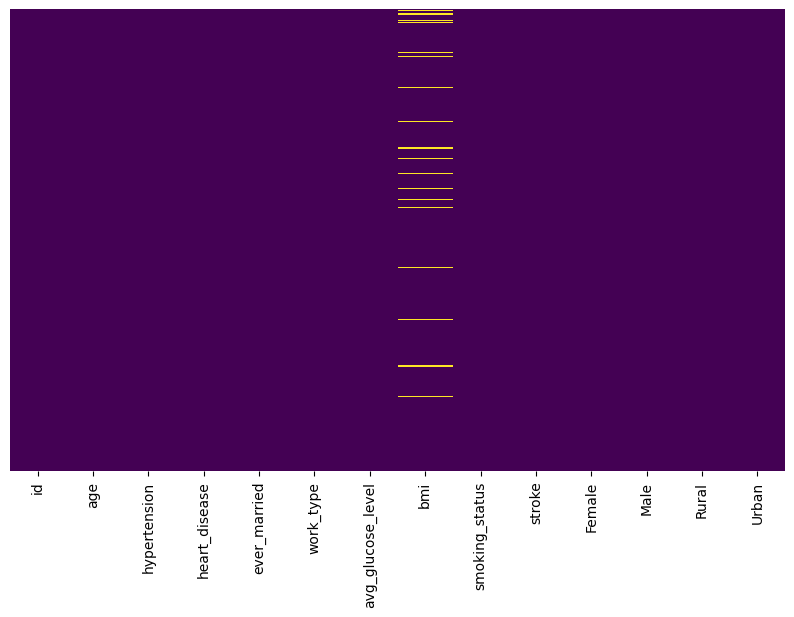

In [76]:
# Only `bmi` has Null values
plt.figure(figsize=(10,6))
sns.heatmap(df_processed.isna(), cbar=False, cmap='viridis', yticklabels=False)

In [77]:
from sklearn.impute import SimpleImputer

In [79]:
imputer = SimpleImputer(strategy='median')
df_processed['bmi'] = df_processed['bmi'].fillna(df_processed['bmi'].median())
df_processed.head()

,id,age,hypertension,heart_disease,ever_married,work_type,avg_glucose_level,bmi,smoking_status,stroke,Female,Male,Rural,Urban
0,9046,67.0,0,1,1,2,228.69,36.6,1,1,0,1,0,1
1,51676,61.0,0,0,1,3,202.21,28.1,2,1,1,0,1,0
2,31112,80.0,0,1,1,2,105.92,32.5,2,1,0,1,1,0
3,60182,49.0,0,0,1,2,171.23,34.4,3,1,1,0,0,1
4,1665,79.0,1,0,1,3,174.12,24.0,2,1,1,0,1,0


<Axes: >

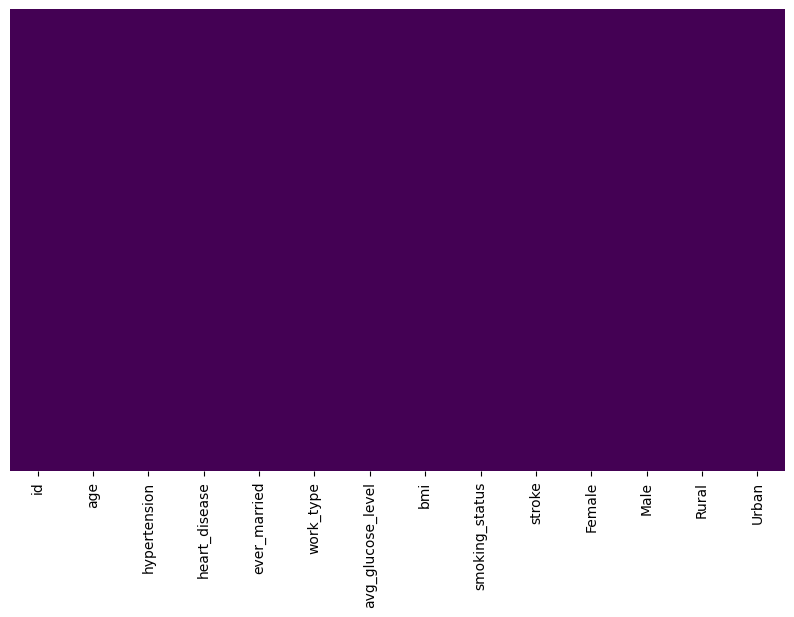

In [80]:
# Null values gone
plt.figure(figsize=(10,6))
sns.heatmap(df_processed.isna(), cbar=False, cmap='viridis', yticklabels=False)